In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('DataClusterKepuasan.csv')

In [3]:
data

,Kepuasan,Loyalitas
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalitas')

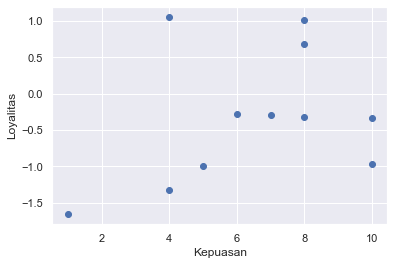

In [5]:
plt.scatter(data['Kepuasan'], data['Loyalitas'])
plt.xlabel('Kepuasan')
plt.ylabel('Loyalitas')

In [6]:
x = data.copy()

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters

,Kepuasan,Loyalitas,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalitas')

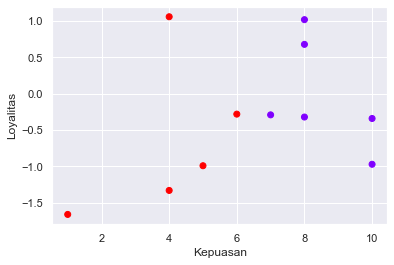

In [12]:
plt.scatter(clusters['Kepuasan'], clusters['Loyalitas'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Kepuasan')
plt.ylabel('Loyalitas')

In [14]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.92937833, -1.16694885],
       [-0.1721071 ,  0.03539363],
       [-0.55074271, -0.7776189 ],
       [ 0.20652852,  0.02394275],
       [-0.92937833,  1.56981165],
       [-2.06528517, -1.54482791],
       [ 1.34243536, -0.75471714],
       [ 0.58516413, -0.01040989],
       [ 0.58516413,  1.52400813],
       [ 0.58516413,  1.13467818],
       [ 1.34243536, -0.03331165]])

In [17]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\ydhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[21.999999999999993,
 10.658180815684936,
 5.47884622048015,
 3.728466807353948,
 2.2432422906176743,
 0.7713394643063797,
 0.5111265254247153,
 0.2950082969203557,
 0.1475369291277115]

Text(0, 0.5, 'WCSS')

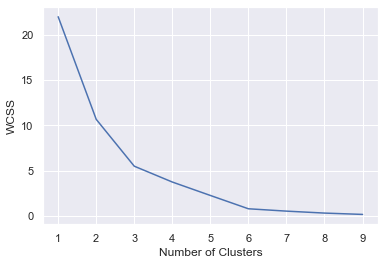

In [18]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [28]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,Kepuasan,Loyalitas,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalitas')

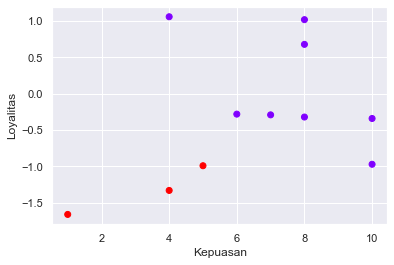

In [29]:
plt.scatter(cluster_new['Kepuasan'], cluster_new['Loyalitas'], c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Kepuasan')
plt.ylabel('Loyalitas')

In [ ]:
#kupon, kasir 2 , dll